In [1]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams[ 'figure.figsize' ] = 15 , 8
import seaborn as sns
sns.set_style( 'white' )
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
#Get and check data
file_path = "G:\Study material\Data Science\Projects\MDSTBlight\\"
data = pd.read_csv(file_path+"train.csv",encoding = 'ISO-8859-1')
data.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [3]:
#Making a copy 
df = data

In [4]:
df.shape

(250306, 34)

In [6]:
df = df.drop(['ticket_id'],1)
df.reindex(data.ticket_id)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,40566.0,"Buildings, Safety Engineering & Env Department","Karwowski, Stephen","LEWIS, W.M.",17332.0,ORLEANS,NaN,17332.0,ORLEANS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
27586,47195.0,Detroit Police Department,"Thornton, Vaughn","HORTON, SHEILA B",15630.0,PLYMOUTH,NaN,11631.0,MONTROSE,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22062,39990.0,"Buildings, Safety Engineering & Env Department","Morris, John","ALLEN, COURTNEY",8960.0,LAUDER,NaN,24765.0,PLUMBRIDGE,SOUTHFIELD,...,0.0,305.0,280.0,25.0,2005-12-21 00:00:00,PAID IN FULL,NaN,NaN,non-compliant by late payment more than 1 month,0.0
22084,40012.0,"Buildings, Safety Engineering & Env Department","Doetsch, James","INVESTMENTS, MIDWEST PROPERTY",12290.0,MCDOUGALL,NaN,228.0,KELLY,EASTPOINTE,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22093,40026.0,"Buildings, Safety Engineering & Env Department","Keys, Edna","MILLER, PATRICK",3738.0,KENDALL,NaN,3738.0,KENDALL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
22046,39916.0,Health Department,"Frazier, Willie","TUCKER, LARRY",14297.0,JEFFERSON,NaN,14297.0,JEFFERSON,DETROIT,...,0.0,85.0,0.0,85.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
18738,37863.0,"Buildings, Safety Engineering & Env Department","Sharpe, Anthony","PEOPLES, ROSLYN",18971.0,HOOVER,NaN,24513.0,N. CAROLINA,SOUTHFIELD,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,IN COLLECTION,NaN,non-compliant by no payment,0.0
18735,37316.0,Health Department,"Bickers-Holmes, Amanda","WILLIAMS, VANITA M",15750.0,FIELDING,NaN,1575.0,FIELDING,DETROIT,...,0.0,85.0,0.0,85.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
18733,37243.0,"Buildings, Safety Engineering & Env Department","Watson, Jerry","TATARIAN, SOPHIE",1420.0,WOODWARD AVE,NaN,2.0,JOHN R,DETROIT,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0


In [6]:
def check_df(df):
    n_columns = len(df.columns)
    ind = [i for i in range(n_columns)]
    for i in range(n_columns):
        print('{0} {1:30} {2:10d} {3} {4} {5}'.format(ind[i], \
                            df.columns[i],df[df.columns[i]].isnull().sum(),\
                            df[df.columns[i]].unique().shape,df.dtypes[i],"\n"))

In [7]:
check_df(df)

0 agency_name                             0 (5,) object 

1 inspector_name                          0 (173,) object 

2 violator_name                          34 (119993,) object 

3 violation_street_number                 0 (19175,) float64 

4 violation_street_name                   0 (1791,) object 

5 violation_zip_code                 250306 (1,) float64 

6 mailing_address_str_number           3602 (15827,) float64 

7 mailing_address_str_name                4 (37897,) object 

8 city                                    0 (5184,) object 

9 state                                  93 (60,) object 

10 zip_code                                1 (5643,) object 

11 non_us_str_code                    250303 (3,) object 

12 country                                 0 (5,) object 

13 ticket_issued_date                      0 (86979,) object 

14 hearing_date                        12491 (6223,) object 

15 violation_code                          0 (235,) object 

16 violation_description 

In [8]:
df.compliance_detail.unique()

array(['non-compliant by no payment',
       'compliant by late payment within 1 month',
       'not responsible by disposition',
       'not responsible by pending judgment disposition',
       'non-compliant by late payment more than 1 month',
       'compliant by early payment', 'compliant by on-time payment',
       'compliant by payment with no scheduled hearing',
       'compliant by payment on unknown date', 'compliant by no fine'], dtype=object)

In [9]:
def drop_row(df,var):
    df = df[(df[var].isnull() == 0)]
    return df

In [10]:
# Dropping all variables which are not in test.csv to avoid Data leakage
df = df.drop(['payment_amount','payment_date','payment_status','balance_due','collection_status','compliance_detail'],1)

In [11]:
# Dropping rows which doesnt have compliance value
df = drop_row(df,'compliance')
check_df(df)

0 agency_name                             0 (5,) object 

1 inspector_name                          0 (159,) object 

2 violator_name                          26 (84657,) object 

3 violation_street_number                 0 (18096,) float64 

4 violation_street_name                   0 (1716,) object 

5 violation_zip_code                 159880 (1,) float64 

6 mailing_address_str_number           2558 (14091,) float64 

7 mailing_address_str_name                3 (28441,) object 

8 city                                    0 (4093,) object 

9 state                                  84 (60,) object 

10 zip_code                                1 (4623,) object 

11 non_us_str_code                    159877 (3,) object 

12 country                                 0 (5,) object 

13 ticket_issued_date                      0 (68097,) object 

14 hearing_date                          227 (5971,) object 

15 violation_code                          0 (189,) object 

16 violation_description  

In [12]:
counter_nan = df.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
df = df[counter_without_nan.keys()]
check_df(df)

0 agency_name                             0 (5,) object 

1 inspector_name                          0 (159,) object 

2 violation_street_number                 0 (18096,) float64 

3 violation_street_name                   0 (1716,) object 

4 city                                    0 (4093,) object 

5 country                                 0 (5,) object 

6 ticket_issued_date                      0 (68097,) object 

7 violation_code                          0 (189,) object 

8 violation_description                   0 (207,) object 

9 disposition                             0 (4,) object 

10 fine_amount                             0 (40,) float64 

11 admin_fee                               0 (1,) float64 

12 state_fee                               0 (1,) float64 

13 late_fee                                0 (37,) float64 

14 discount_amount                         0 (13,) float64 

15 clean_up_cost                           0 (1,) float64 

16 judgment_amount                  

In [13]:
#Dropping variables with high number of NA

#df = df.drop(['violation_zip_code','non_us_str_code','grafitti_status'],1)

In [14]:
'''
df = drop_row(df,'violator_name')
df = drop_row(df,'mailing_address_str_number')
df = drop_row(df,'hearing_date')
df = drop_row(df,'state')
df = drop_row(df,'mailing_address_str_name')
df = drop_row(df,'zip_code')
check_df(df)
'''

"\ndf = drop_row(df,'violator_name')\ndf = drop_row(df,'mailing_address_str_number')\ndf = drop_row(df,'hearing_date')\ndf = drop_row(df,'state')\ndf = drop_row(df,'mailing_address_str_name')\ndf = drop_row(df,'zip_code')\ncheck_df(df)\n"

In [15]:
# Data is cleaned


In [16]:
#Define useful functions
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) 
        #+ ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout() # Improves appearance a bit.
    plt.show()
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    facet.set_xticklabels()
    plt.show()
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col, size=3, aspect=2,legend_out = True )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    facet.set_xticklabels()
    plt.show()

In [17]:
df.shape

(159880, 18)

In [18]:
df.describe()

,violation_street_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance
count,1.598800e+05,159880.000000,159880.0,159880.0,159880.000000,159880.000000,159880.0,159880.000000,159880.000000
mean,1.071316e+04,357.035295,20.0,10.0,33.651512,0.195959,0.0,420.650218,0.072536
std,3.623159e+04,675.655580,0.0,0.0,67.692916,4.290344,0.0,742.555062,0.259374
min,0.000000e+00,0.000000,20.0,10.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,4.920000e+03,200.000000,20.0,10.0,10.000000,0.000000,0.0,250.000000,0.000000
50%,1.039800e+04,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000
75%,1.578325e+04,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000
max,1.415411e+07,10000.000000,20.0,10.0,1000.000000,350.000000,0.0,11030.000000,1.000000


In [19]:
df.agency_name.unique()

array(['Buildings, Safety Engineering & Env Department',
       'Health Department', 'Department of Public Works',
       'Detroit Police Department', 'Neighborhood City Halls'], dtype=object)

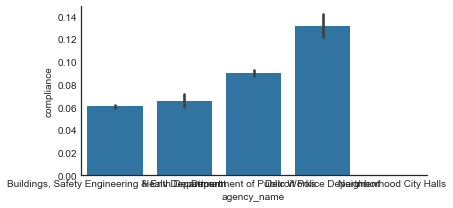

In [20]:
plot_categories(df, 'agency_name', 'compliance')

In [21]:
df.groupby(['agency_name','compliance']).count()['city']

agency_name                                     compliance
Buildings, Safety Engineering & Env Department  0.0           90040
                                                1.0            5823
Department of Public Works                      0.0           47727
                                                1.0            4718
Detroit Police Department                       0.0            3876
                                                1.0             588
Health Department                               0.0            6639
                                                1.0             468
Neighborhood City Halls                         0.0               1
Name: city, dtype: int64

In [22]:
agency = pd.get_dummies( df.agency_name , prefix='AgName')

In [23]:
agency.drop(['AgName_Neighborhood City Halls'],axis =1,inplace=True)
agency.drop(['AgName_Health Department'],axis =1,inplace=True)

In [24]:
agency.head()

,"AgName_Buildings, Safety Engineering & Env Department",AgName_Department of Public Works,AgName_Detroit Police Department
0,1,0,0
1,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0


In [25]:
df.inspector_name.unique().shape

(159,)

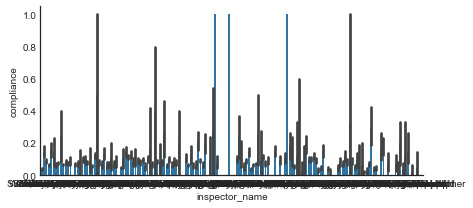

In [26]:
plot_categories(df, 'inspector_name','compliance')

In [27]:
ins = df.groupby(['inspector_name','compliance']).count()

In [28]:
#Have to work on inspectors
# check for inspectors with compliance >90%

In [29]:
#Removing variables with only one unique value 
df = df.drop(['admin_fee','state_fee','clean_up_cost'],1)

In [30]:
df.country.unique()

array(['USA', 'Cana', 'Aust', 'Egyp', 'Germ'], dtype=object)

In [31]:
df.groupby(['country','compliance']).count()['city']

country  compliance
Aust     0.0                1
         1.0                1
Cana     0.0                6
Egyp     0.0                1
         1.0                1
Germ     0.0                1
USA      0.0           148274
         1.0            11595
Name: city, dtype: int64

In [32]:
df.disposition.unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'], dtype=object)

In [33]:
df.groupby(['disposition','compliance']).count()['city']

disposition                         compliance
Responsible (Fine Waived) by Deter  1.0              195
Responsible by Admission            0.0             9933
                                    1.0             3768
Responsible by Default              0.0           133055
                                    1.0             5285
Responsible by Determination        0.0             5295
                                    1.0             2349
Name: city, dtype: int64

In [34]:
#Drop country and create dummies for disposition
df = df.drop(['country'],1)
disposition = pd.get_dummies( df.disposition , prefix='Dis' )

In [35]:
disposition.head()

,Dis_Responsible (Fine Waived) by Deter,Dis_Responsible by Admission,Dis_Responsible by Default,Dis_Responsible by Determination
0,0,0,1,0
1,0,0,0,1
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0


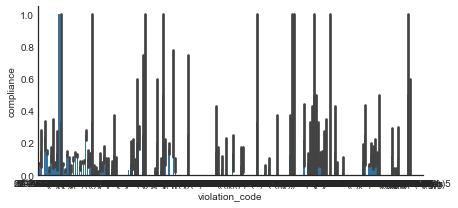

In [36]:
plot_categories(df,'violation_code','compliance')

In [37]:
check_df(df)

0 agency_name                             0 (5,) object 

1 inspector_name                          0 (159,) object 

2 violation_street_number                 0 (18096,) float64 

3 violation_street_name                   0 (1716,) object 

4 city                                    0 (4093,) object 

5 ticket_issued_date                      0 (68097,) object 

6 violation_code                          0 (189,) object 

7 violation_description                   0 (207,) object 

8 disposition                             0 (4,) object 

9 fine_amount                             0 (40,) float64 

10 late_fee                                0 (37,) float64 

11 discount_amount                         0 (13,) float64 

12 judgment_amount                         0 (57,) float64 

13 compliance                              0 (2,) float64 



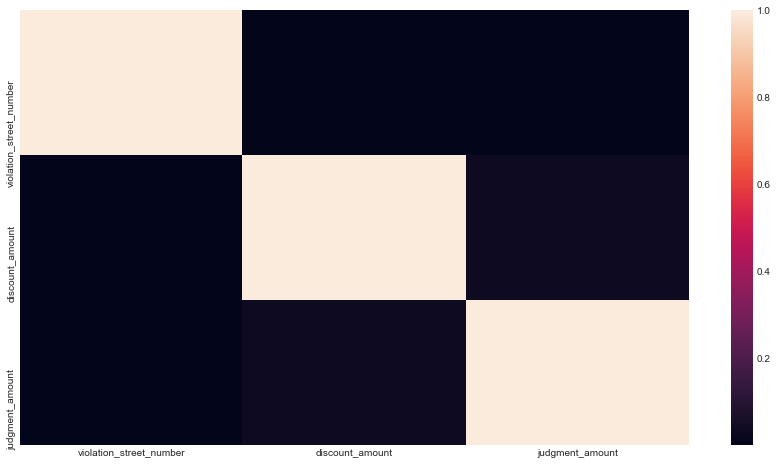

In [38]:
dfs = df[['violation_street_number','discount_amount','judgment_amount']]
corr = dfs.corr()
sns.heatmap(corr)
plt.show()

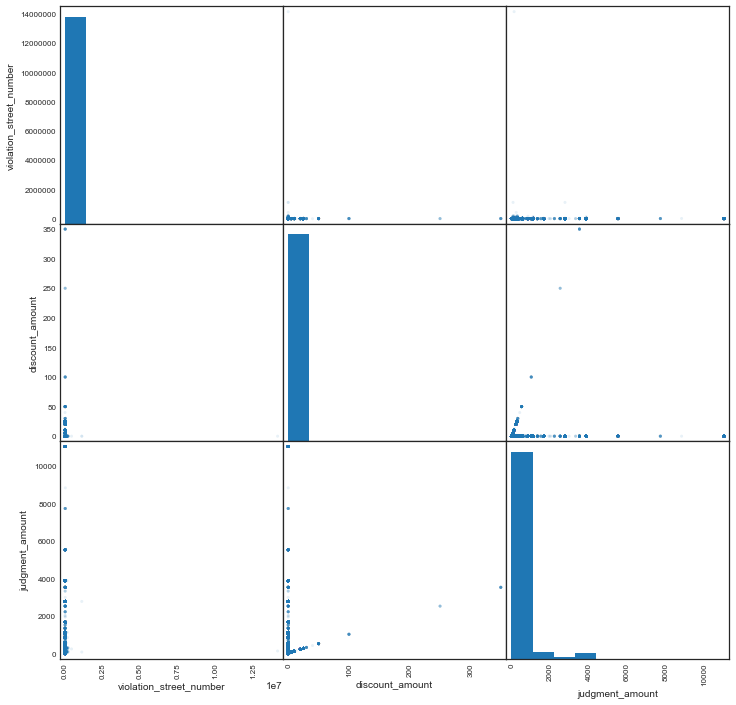

In [39]:
#scatter matrix
pd.plotting.scatter_matrix(dfs, alpha=0.1, figsize = (12,12),diagonal='hist')
plt.show()

In [40]:
#Selected columns from df and scale them
y = df['compliance']
X = pd.concat([agency,disposition,dfs],axis =1)
X.head()

,"AgName_Buildings, Safety Engineering & Env Department",AgName_Department of Public Works,AgName_Detroit Police Department,Dis_Responsible (Fine Waived) by Deter,Dis_Responsible by Admission,Dis_Responsible by Default,Dis_Responsible by Determination,violation_street_number,discount_amount,judgment_amount
0,1,0,0,0,0,1,0,2900.0,0.0,305.0
1,1,0,0,0,0,0,1,4311.0,0.0,855.0
5,1,0,0,0,0,1,0,6478.0,0.0,305.0
6,1,0,0,0,0,1,0,8027.0,0.0,855.0
7,1,0,0,0,0,1,0,8228.0,0.0,140.0


In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
X_train , X_valid , y_train , y_valid = model_selection.train_test_split( X_scaled , y , train_size = .75, random_state =0 )

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
# Spot Check Algorithms
seed = 42
def model_check(models):
    
    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
        results.append(cv_results)
        names.append(name)
        print('{0:20} : {1:f} {2:f}'.format(name, cv_results.mean(), cv_results.std()))

    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR                   : 0.778767 0.005820


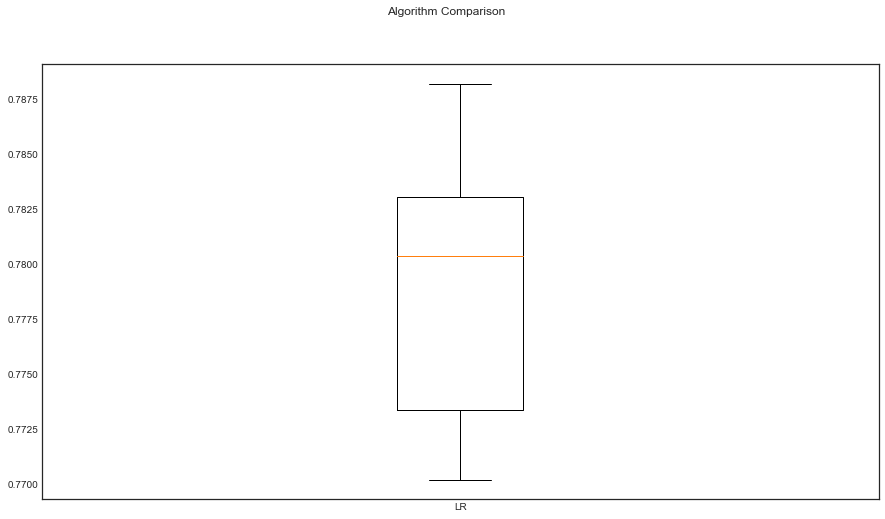

In [44]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('Decision Tree', DecisionTreeClassifier()))
#models.append(('Gaussian NB', GaussianNB()))
#models.append(('LinearSVC', LinearSVC()))
#models.append(('Random Forest', RandomForestClassifier()))
model_check(models)

In [45]:
model = LogisticRegression(random_state=0)

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
print("Train score: ",model.score(X_train,y_train))
print("Test score: ",model.score(X_valid,y_valid))

Train score:  0.933124843633
Test score:  0.932599449587


In [48]:
pred = model.predict_proba(X_valid)

In [49]:
print("ROC AUC score: ",roc_auc_score(y_valid,pred[:,1]))

ROC AUC score:  0.775432097204


In [51]:
test = pd.read_csv(file_path+"test.csv",encoding = 'ISO-8859-1')
Tagency = pd.get_dummies( test.agency_name , prefix='AgName')
Tdisposition = pd.get_dummies( test.disposition , prefix='Dis' )
Tdisposition = Tdisposition[['Dis_Responsible (Fine Waived) by Deter', \
                'Dis_Responsible by Admission','Dis_Responsible by Default','Dis_Responsible by Determination']]
Tdfs = test[['violation_street_number','discount_amount','judgment_amount']]
X_test = pd.concat([Tagency,Tdisposition,Tdfs],axis =1)
X_test_scaled = scaler.transform(X_test)

In [52]:
y_predicted = model.predict_proba(X_test_scaled)

In [53]:
fin = pd.Series(y_predicted[:,1],index = test['ticket_id'] )

In [54]:
def testing_code(y_predicted):
    bm = y_predicted #blight_model()
    res = 'Data type Test: '
    res += ['Failed: type(bm) should Series\n','Passed\n'][type(bm)==pd.Series]
    res += 'Data shape Test: '
    res += ['Failed: len(bm) should be 61001\n','Passed\n'][len(bm)==61001]
    res += 'Data Values Test: '
    res += ['Failed: all values should be in [0.,1.]\n','Passed\n'][all((bm<=1.) & (bm>=0.))]
    res += 'Data Values type Test: '
    res += ['Failed: bm.dtype should be float\n','Passed\n'][str(bm.dtype).count('float')>0]
    res += 'Index type Test: '
    res += ['Failed: type(bm.index) should be Int64Index\n','Passed\n'][type(bm.index)==pd.Int64Index]
    res += 'Index values type Test: '
    res += ['Failed: type(bm.index[0]) should be int64\n','Passed\n'][str(type(bm.index[0])).count("int64")>0]

    res += 'Output index shape test:'
    res += ['Failed, bm.index.shape should be (61001,)\n','Passed\n'][bm.index.shape==(61001,)]

    res += 'Output index test: '
    if bm.index.shape==(61001,):
        res +=['Failed\n','Passed\n'][all(pd.read_csv(file_path+'test.csv',usecols=[0],index_col=0).sort_index().index.values==bm.sort_index().index.values)]
    else:
        res+='Failed'
    print(res)

In [55]:
testing_code(fin)

Data type Test: Passed
Data shape Test: Passed
Data Values Test: Passed
Data Values type Test: Passed
Index type Test: Passed
Index values type Test: Passed
Output index shape test:Passed
Output index test: Passed

